In [1]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx

In [2]:
import networkx as nx
SYC23_GRAPH = nx.from_edgelist([
    ((3, 2), (4, 2)), ((4, 1), (5, 1)), ((4, 2), (4, 1)), 
    ((4, 2), (4, 3)), ((4, 2), (5, 2)), ((4, 3), (5, 3)), 
    ((5, 1), (5, 0)), ((5, 1), (5, 2)), ((5, 1), (6, 1)), 
    ((5, 2), (5, 3)), ((5, 2), (6, 2)), ((5, 3), (5, 4)), 
    ((5, 3), (6, 3)), ((5, 4), (6, 4)), ((6, 1), (6, 2)), 
    ((6, 2), (6, 3)), ((6, 2), (7, 2)), ((6, 3), (6, 4)), 
    ((6, 3), (7, 3)), ((6, 4), (6, 5)), ((6, 4), (7, 4)), 
    ((6, 5), (7, 5)), ((7, 2), (7, 3)), ((7, 3), (7, 4)), 
    ((7, 3), (8, 3)), ((7, 4), (7, 5)), ((7, 4), (8, 4)), 
    ((7, 5), (7, 6)), ((7, 5), (8, 5)), ((8, 3), (8, 4)), 
    ((8, 4), (8, 5)), ((8, 4), (9, 4)), 
])

(-0.30000000000000004, 6.300000000000001, -9.3, -2.7)

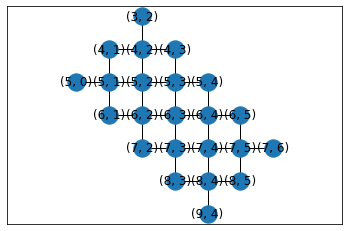

In [3]:
pos = {n: (n[1], -n[0]) for n in SYC23_GRAPH.nodes}
nx.draw_networkx(SYC23_GRAPH, pos=pos)
plt.axis('equal')

(4.6, 13.400000000000002, -5.2, -0.8)

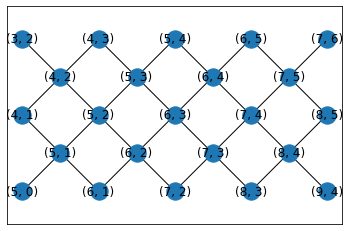

In [4]:
pos = {(x,y): (x+y, y-x) for x, y in SYC23_GRAPH.nodes}
nx.draw_networkx(SYC23_GRAPH, pos=pos)
plt.axis('equal')

(-1.15, 2.1500000000000004, -2.15, 1.15)

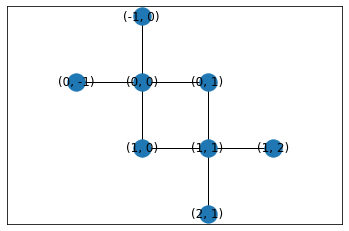

In [5]:
def get_diag_rect(width, height):
    g = nx.Graph()
    for megarow in range(height):
        for megacol in range(width):
            y = megacol + megarow
            x = megacol - megarow
            g.add_edge((x, y), (x-1, y))
            g.add_edge((x, y), (x, y-1))
            g.add_edge((x, y), (x+1, y))
            g.add_edge((x, y), (x, y+1))
    return g
            
rr = get_diag_rect(width=2, height=1)
#rr = get_diag_rect(width=2, height=2)
pos = {n: (n[1], -n[0]) for n in rr.nodes}
nx.draw_networkx(rr, pos=pos)
plt.axis('equal')

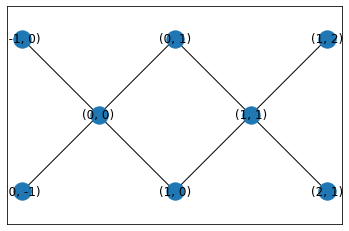

In [6]:
pos = {(x,y): (x+y, y-x) for x, y in rr.nodes}
nx.draw_networkx(rr, pos=pos)
#plt.axis('equal')
ax = plt.gca().axis('equal')

192
12


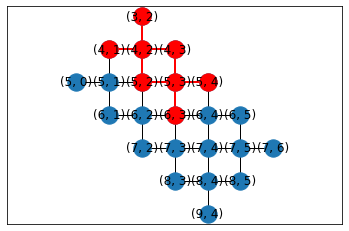

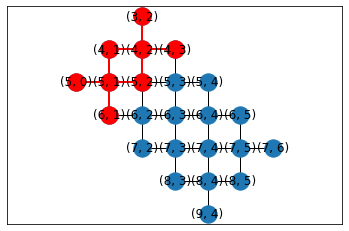

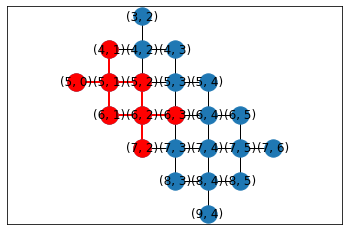

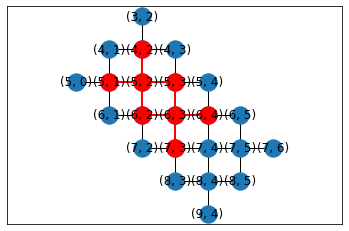

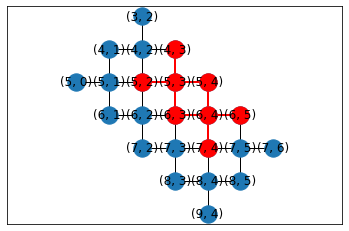

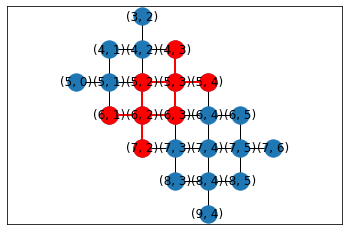

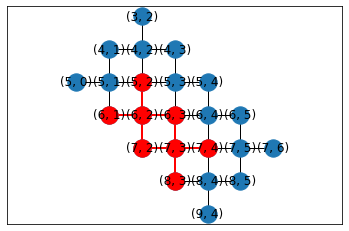

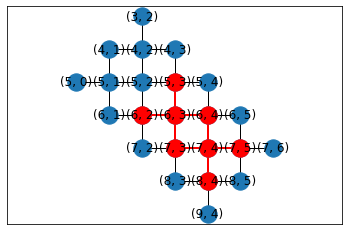

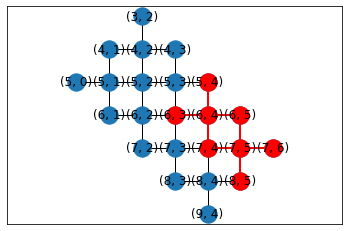

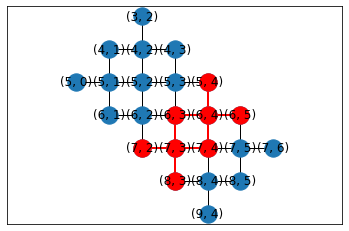

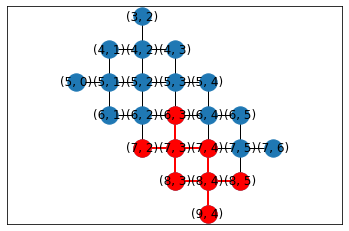

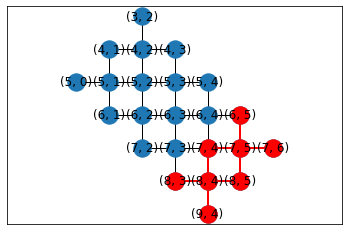

12


In [7]:
matcher = nx.algorithms.isomorphism.GraphMatcher(SYC23_GRAPH, rr)

count = 0
dedupe = {}
for big_to_small_map in matcher.subgraph_monomorphisms_iter():
    dedupe[frozenset(big_to_small_map.keys())] = big_to_small_map
    count += 1
print(count)
print(len(dedupe))


count = 0
for big_to_small_map in dedupe.values():
    count += 1
    pos = {n: (n[1], -n[0]) for n in SYC23_GRAPH.nodes}
    nx.draw_networkx(SYC23_GRAPH, pos=pos)
    
    small_to_big_map = {v: k for k, v in big_to_small_map.items()}
    rr_mapped = nx.relabel_nodes(rr, small_to_big_map)
    pos = {n: (n[1], -n[0]) for n in rr_mapped.nodes}
    nx.draw_networkx(rr_mapped, pos=pos, node_color='red', edge_color='red', width=2, with_labels=False)
    plt.axis('equal')
    plt.show()
    
    if count > 20:
        break
    
    
print(count)

## Recirq

In [8]:
from recirq.named_topologies import DiagonalRectangleTopology, get_placements

264
11


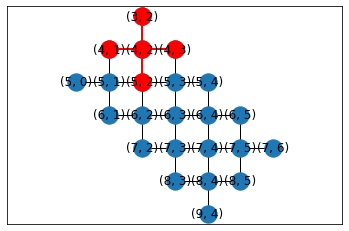

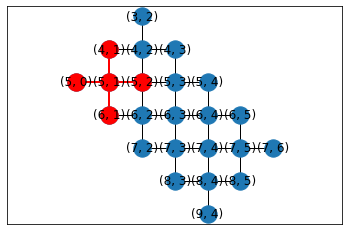

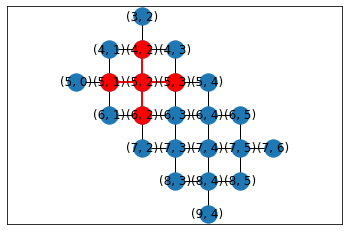

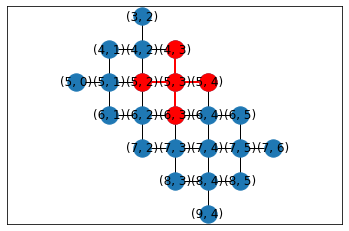

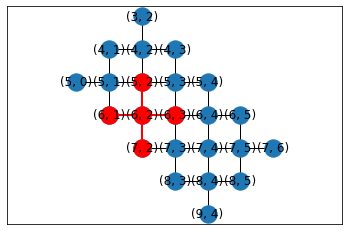

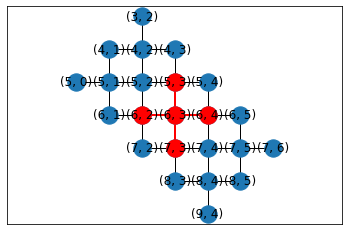

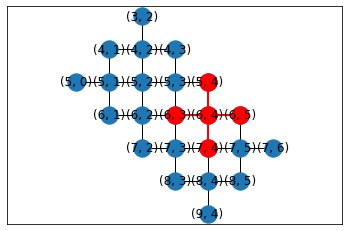

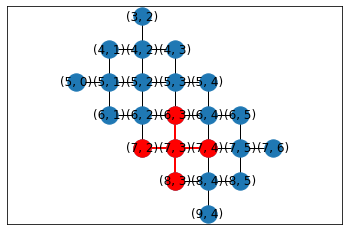

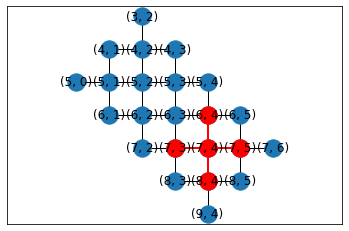

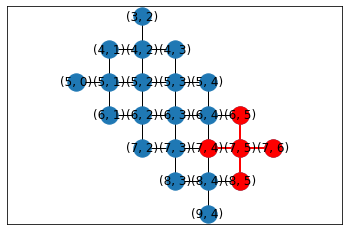

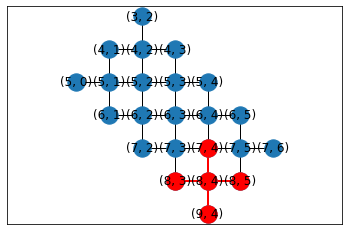

In [9]:
rr = DiagonalRectangleTopology(1, 1).graph
subgs = get_placements(SYC23_GRAPH, rr, plt=plt)

In [10]:
subg = subgs[0]

In [11]:
sorted(subg.nodes)

[(3, 2), (4, 1), (4, 2), (4, 3), (5, 2)]

## Sizes

In [12]:
import itertools

In [13]:
ww = np.arange(1, 3+1)
for widthi, heighti in itertools.combinations_with_replacement(np.arange(len(ww)), r=2):
    print(widthi, heighti)

0 0
0 1
0 2
1 1
1 2
2 2


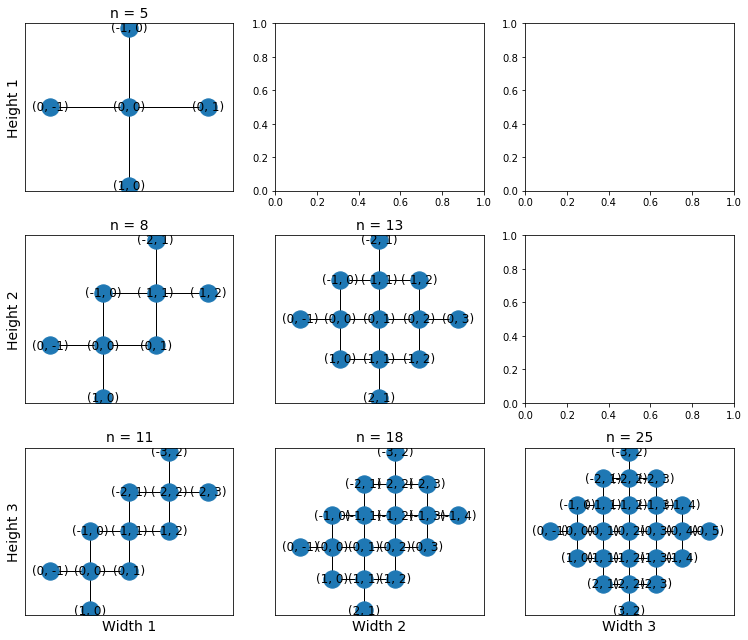

In [14]:
ww = np.arange(1, 3+1)

fig, axes = plt.subplots(len(ww), len(ww), figsize=(3.5*len(ww), 3*len(ww)))
for widthi, heighti in itertools.combinations_with_replacement(np.arange(len(ww)), r=2):
    width = ww[widthi]
    height = ww[heighti]
    ax = axes[heighti, widthi]
    topo = DiagonalRectangleTopology(width, height)
    topo.draw(ax=ax, cartesian=True)
    if widthi != heighti:
        # turn off its pair-but-reversed
        #axes[widthi, heighti].axis('off')
        pass
        
    if widthi == 0:
        ax.set_ylabel(f'Height {height}', fontsize=14)
    if heighti == len(ww)-1:
        ax.set_xlabel(f'Width {width}', fontsize=14)
    
    ax.set_title(f'n = {topo.n_qubits}', fontsize=14)
        
fig.tight_layout()